In [12]:
import torch
from torch import nn
from __init__ import init
init()

from utils.util import *
from model.train import *

In [4]:
# 加载数据集

batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

In [5]:
# 初始化模型参数
net = nn.Sequential(nn.Flatten(), nn.Linear(28 * 28, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [10]:
# 定义损失函数 交叉熵 -log(softmax(logits)) 
# 这一步已经用了 softmax ，目的是为了确保数值稳定性

loss = nn.CrossEntropyLoss(reduction='none')

In [11]:
# 定义优化算法

trainer = torch.optim.SGD(net.parameters(), lr=0.1)

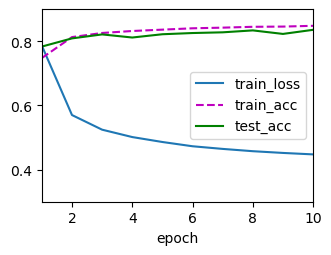

In [13]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, loss, 10, trainer)